# Classification with a single perceptron

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
root_notebook_folder = os.path.abspath('.')
data_folder = os.path.abspath('./local_data')


## Generate data for classification

In [2]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100, n_classes=2, n_clusters_per_class=1,
    n_features=2,  n_informative=2, n_redundant=0, n_repeated=0, 
    shuffle=True, random_state=42)

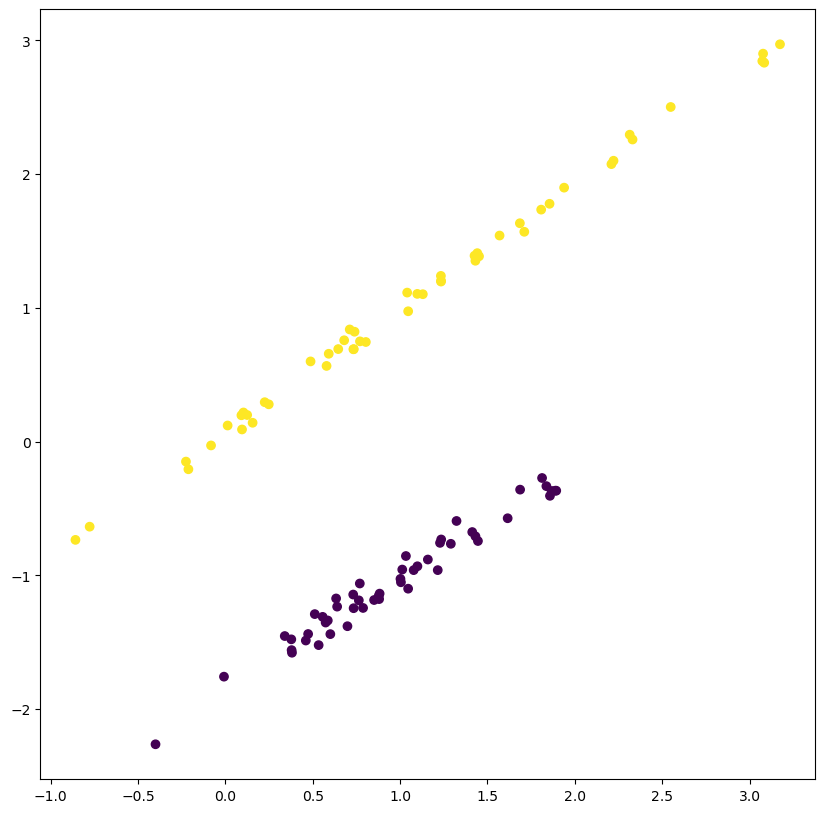

In [3]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y)

##  Logistic regression

Text(0.5, 1.0, 'Logit-based predictions.  Score: 1.0 ')

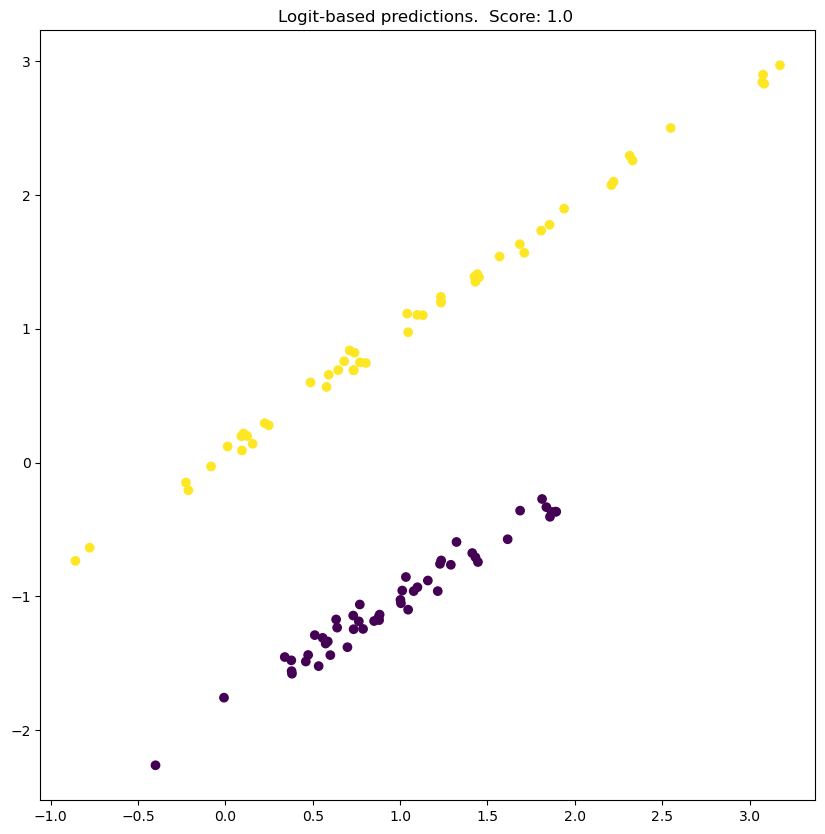

In [4]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(penalty='l2', fit_intercept=True).fit(X, y)

plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c= logit.predict(X))
plt.title(f'Logit-based predictions.  Score: {logit.score(X,y)} ')

Logit decision boundary

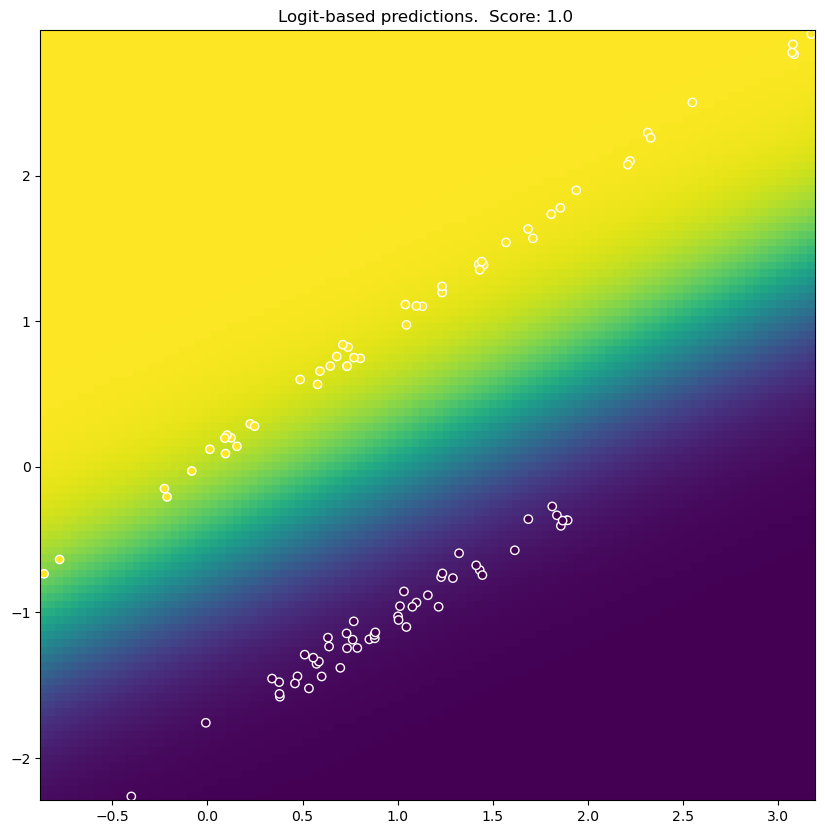

In [5]:
plt.figure(figsize=(10,10))
plt.title(f'Logit-based predictions.  Score: {logit.score(X,y)} ')

i,j = np.meshgrid( np.linspace(X[:,0].min(), X[:,0].max(),100), np.linspace(X[:,1].min(), X[:,1].max(),100) )
ij = np.hstack([i.reshape(-1,1),j.reshape(-1,1)])

plt.pcolor(i,j,logit.predict_proba( ij )[:,1].reshape(i.shape), shading='auto')

plt.scatter(X[:,0], X[:,1], c= logit.predict(X), edgecolors ='w')

## Use single perceptron
$$\large y = \sigma (w^T \cdot x + b) = \sigma(x_0 \cdot w_0 + x_1 \cdot w_1 + b)$$
$\sigma$ - sigmoid
$$\sigma(x) = \frac {1}{1+e^{-x}} $$

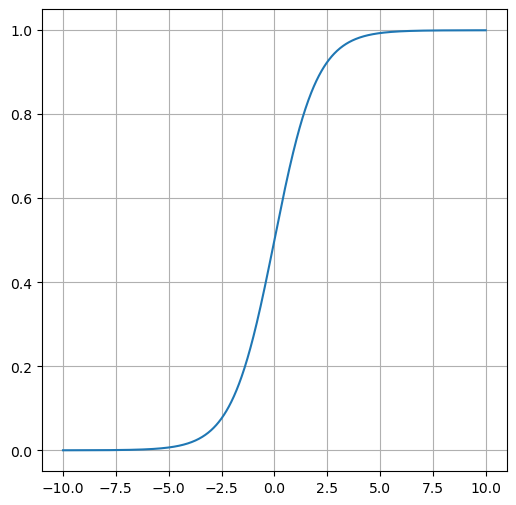

In [6]:
plt.subplots(figsize=(6,6))
x = np.linspace(-10,10, 1000)

from tensorflow.keras import activations
plt.plot(x, activations.sigmoid(x))

plt.grid(True)

### Define the model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
perceptron = Sequential()
perceptron.add(Dense(1, input_dim=2, activation='sigmoid'))
perceptron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [8]:
perceptron.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

demonstrate the model use

### train the model

In [9]:
training_history = perceptron.fit(X, y, epochs=10000, batch_size=len(X), verbose=0)

### Explore the model

In [10]:
y_pred = perceptron.predict(X)
y_pred.shape

4/4 [==============================] - 0s 1ms/step


(100, 1)

In [11]:
loss, accuracy = perceptron.evaluate(X, y, verbose=0)
print(f"Training set loss: {loss}, accuracy: {accuracy}")

Training set loss: 0.007580993697047234, accuracy: 1.0


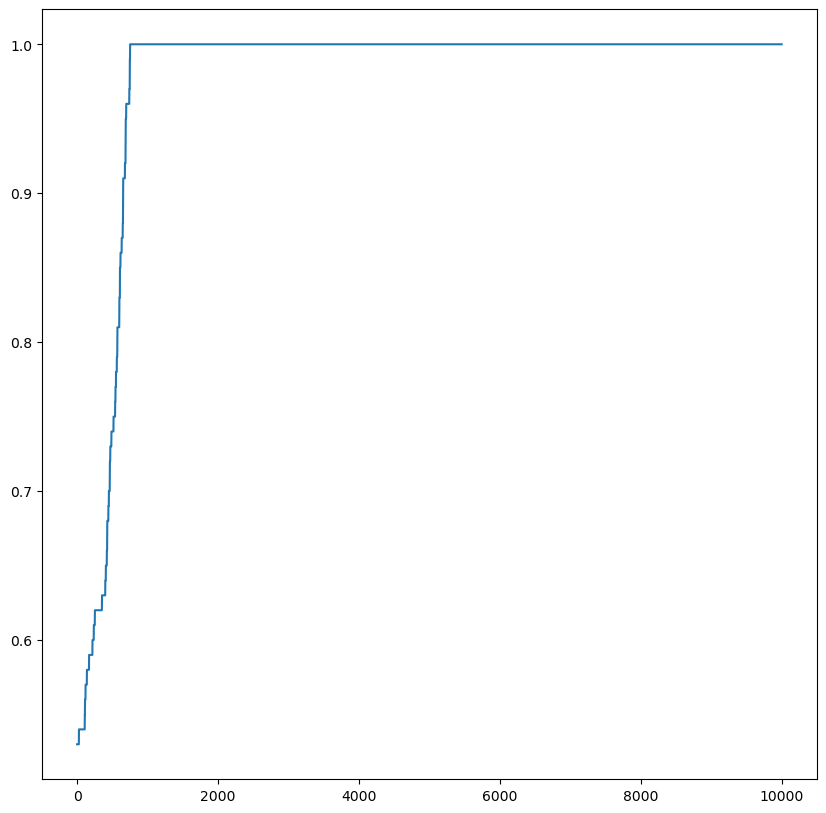

In [12]:
plt.subplots(figsize=(10,10))
plt.plot(training_history.history['accuracy'])

313/313 [==============================] - 0s 769us/step


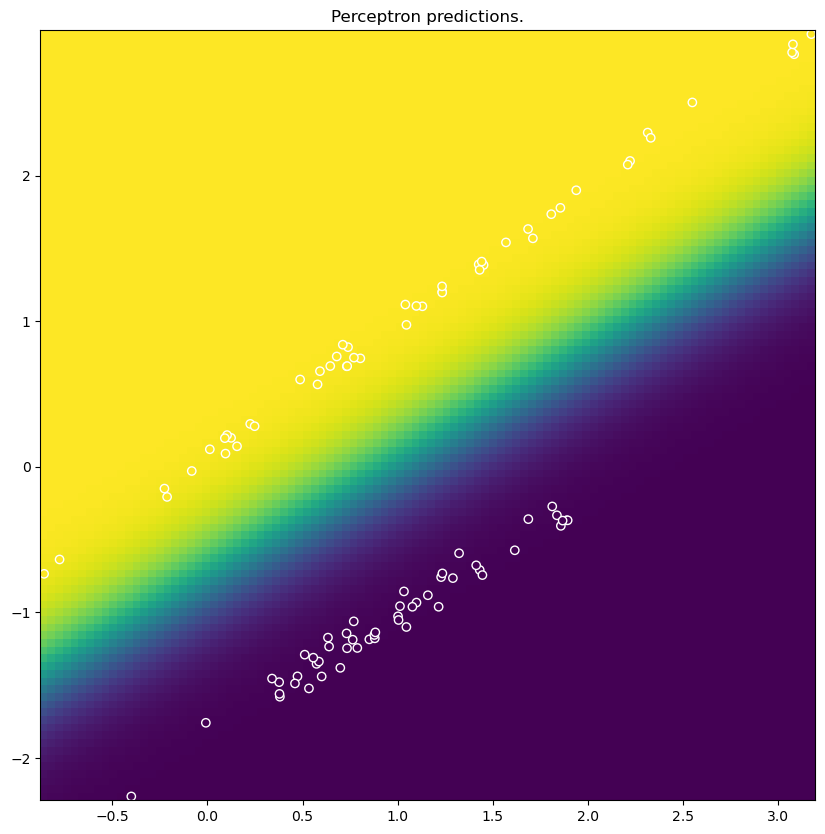

In [13]:
plt.figure(figsize=(10,10))
plt.title(f'Perceptron predictions.')

i,j = np.meshgrid( np.linspace(X[:,0].min(), X[:,0].max(),100), np.linspace(X[:,1].min(), X[:,1].max(),100) )
ij = np.hstack([i.reshape(-1,1),j.reshape(-1,1)])

plt.pcolor(i,j,perceptron.predict(ij).reshape(i.shape), shading='auto')

plt.scatter(X[:,0], X[:,1], c=y , edgecolors ='w')

## Implement 2-perceptron classifier. 

### Define the model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
perceptron2 = Sequential()
perceptron2.add(Dense(2, input_dim=2, activation='sigmoid'))
perceptron2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


### Prepare the data

In [15]:
yv = np.hstack( [y.reshape(-1,1), 1-y.reshape(-1,1)])
yv

array([[0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1,

### compile the model

In [16]:
perceptron2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train the model

In [17]:
training_history = perceptron2.fit(X, yv, epochs=10000, batch_size=len(X), verbose=0)

### Evaluate the model

In [18]:
loss, accuracy = perceptron2.evaluate(X, yv, verbose=0)
print(f"Training set loss: {loss}, accuracy: {accuracy}")

Training set loss: 0.0015906654298305511, accuracy: 1.0


In [19]:
perceptron2.predict(X)

4/4 [==============================] - 0s 1ms/step


array([[0.01058912, 0.8476393 ],
       [0.00678477, 0.9112835 ],
       [0.9571426 , 0.01160575],
       [0.0118158 , 0.88092864],
       [0.01198503, 0.8791269 ],
       [0.01877286, 0.8367411 ],
       [0.01475197, 0.86424524],
       [0.9587295 , 0.04206485],
       [0.01398624, 0.8121042 ],
       [0.95029974, 0.023883  ],
       [0.014605  , 0.85962474],
       [0.01138269, 0.84031963],
       [0.96388245, 0.02750322],
       [0.9407051 , 0.01763869],
       [0.9182586 , 0.01400801],
       [0.00865843, 0.87935585],
       [0.01476316, 0.830013  ],
       [0.9642604 , 0.03841776],
       [0.947377  , 0.03927612],
       [0.93058646, 0.02617073],
       [0.0084994 , 0.871297  ],
       [0.9245509 , 0.01325913],
       [0.00427099, 0.8806942 ],
       [0.9662205 , 0.03003384],
       [0.9371555 , 0.01152615],
       [0.9587243 , 0.03987549],
       [0.9493438 , 0.02842231],
       [0.00820755, 0.89172316],
       [0.02082705, 0.8716445 ],
       [0.00418267, 0.8819188 ],
       [0.

### Explore model parameters

In [20]:
perceptron2.layers[0].weights, perceptron2.layers[0].bias

([<tf.Variable 'dense_1/kernel:0' shape=(2, 2) dtype=float32, numpy=
  array([[-3.6482046,  2.0348103],
         [ 3.8230016, -2.714507 ]], dtype=float32)>,
  <tf.Variable 'dense_1/bias:0' shape=(2,) dtype=float32, numpy=array([ 2.8385437, -2.8385432], dtype=float32)>],
 <tf.Variable 'dense_1/bias:0' shape=(2,) dtype=float32, numpy=array([ 2.8385437, -2.8385432], dtype=float32)>)

In [21]:
logit.coef_

array([[-1.88643558,  3.1317861 ]])

## Multi-class classification

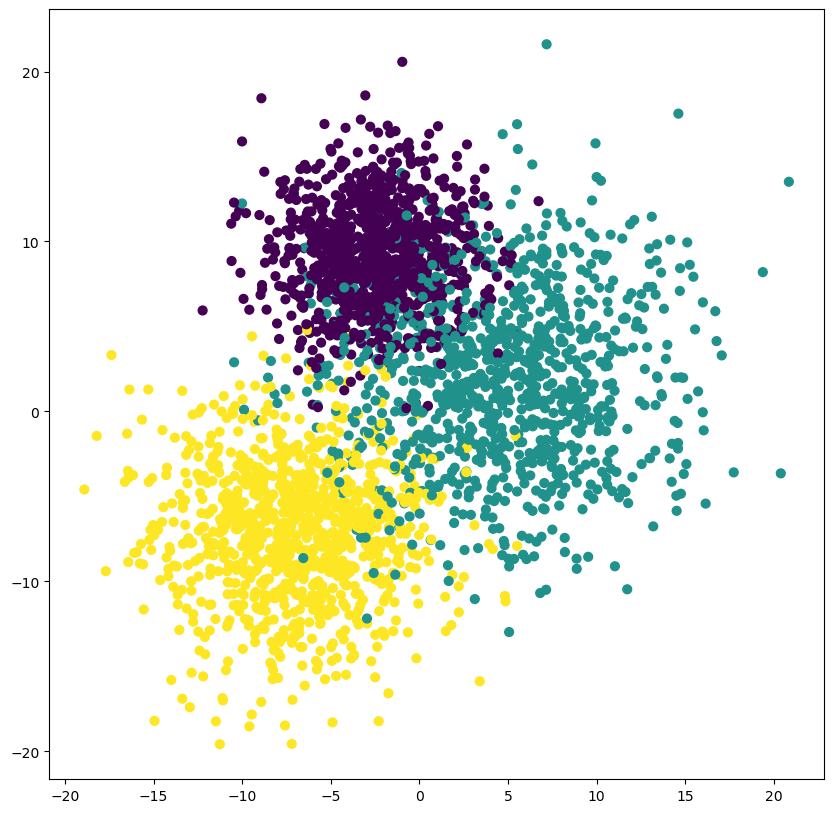

In [22]:
from sklearn.datasets import make_blobs
dx,dy = make_blobs(n_samples=[1000,1000, 1000], n_features=2, centers=None, 
               cluster_std=(3.0, 5.0, 4.0), center_box=(- 10.0, 10.0), 
               shuffle=True, random_state=42, return_centers=False)
plt.figure(figsize=(10,10))
plt.scatter(dx[:,0],dx[:,1],c=dy, s=40)

Note that this can be handled by multinomial logit (1 vs 1 or 1 vs many)

### Define ANN model

In [23]:
perceptron3 = Sequential()
perceptron3.add(Dense(3, input_dim=2, activation='sigmoid'))
perceptron3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [24]:
perceptron3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### prepare the data: one-hot encoding

In [25]:
import tensorflow as tf
dyt = tf.one_hot(dy, depth=3)
dyt

<tf.Tensor: shape=(3000, 3), dtype=float32, numpy=
array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)>

### Train the model

In [26]:
training_history = perceptron3.fit(dx, dyt, epochs=200, batch_size=len(X), verbose=0)

### Evaluate the model

In [27]:
loss, accuracy = perceptron3.evaluate(dx, dyt, verbose=0)
print(f"Training set loss: {loss}, accuracy: {accuracy}")

Training set loss: 0.250845342874527, accuracy: 0.8999999761581421


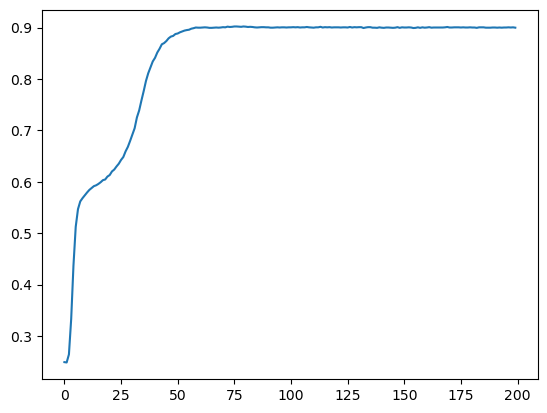

In [28]:
plt.plot(training_history.history['accuracy'])

### Display results

94/94 [==============================] - 0s 806us/step


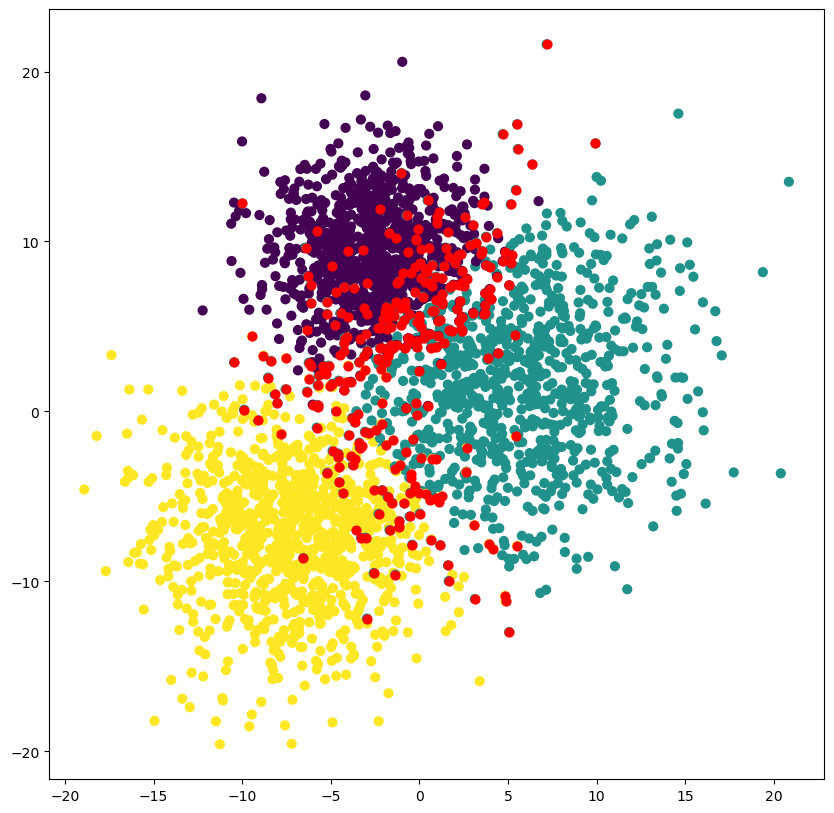

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(dx[:,0],dx[:,1],c=dy, s=40)

y_pred = perceptron3.predict(dx)
pred_class = y_pred.argmax(axis=1)
true_class = dy
plt.scatter(dx[pred_class!=true_class,0],dx[pred_class!=true_class,1],c='r', s=40)

## Define a more complex model

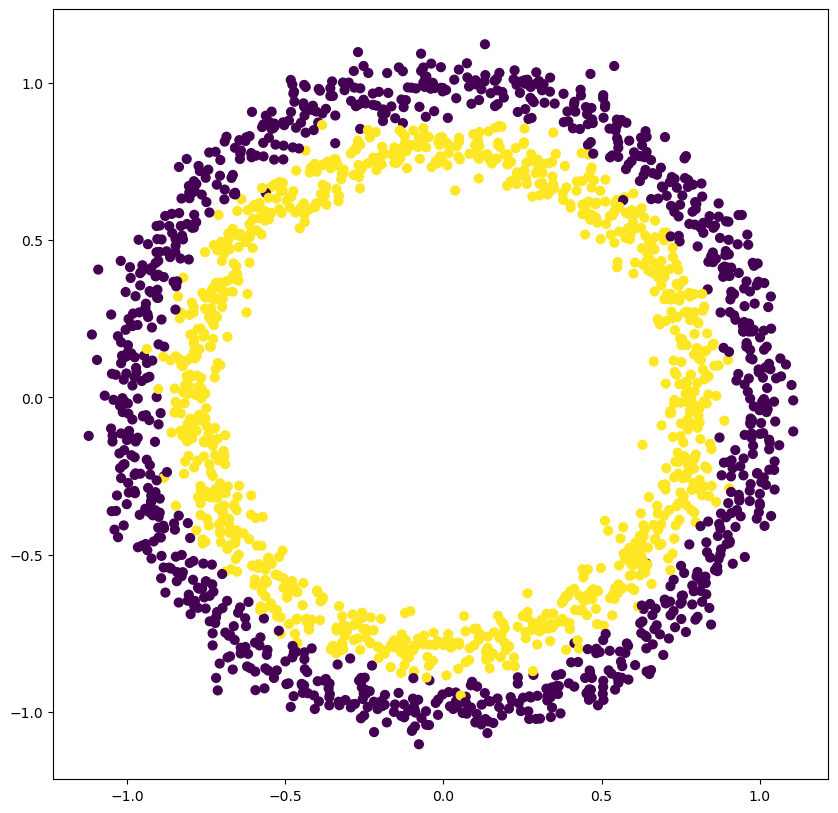

In [30]:
from sklearn.datasets import make_circles
dx, dy = make_circles(n_samples=[1000, 1000], shuffle=True, noise=0.05, random_state=42, factor=0.8)
plt.figure(figsize=(10,10))
plt.scatter(dx[:,0],dx[:,1],c=dy, s=40)

### Define the model

In [31]:
perceptron4 = Sequential()
perceptron4.add(Dense(2, input_dim=2, activation='sigmoid'))
perceptron4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [32]:
perceptron4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Prepare the data

In [33]:
dyt = tf.one_hot( dy, depth=2)

### Train the model

In [34]:
training_history = perceptron4.fit(dx, dyt, epochs=200, batch_size=len(X), verbose=0)

### Evaluate the model

In [35]:
loss, accuracy = perceptron4.evaluate(dx, dyt, verbose=0)
print(f"Training set loss: {loss}, accuracy: {accuracy}")

Training set loss: 0.6931459903717041, accuracy: 0.49549999833106995


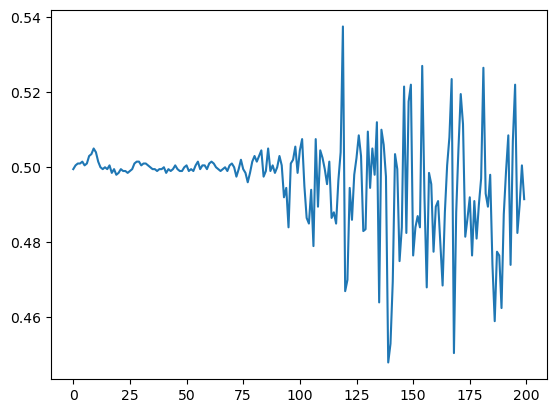

In [36]:
plt.plot(training_history.history['accuracy'])

### Display results

63/63 [==============================] - 0s 790us/step


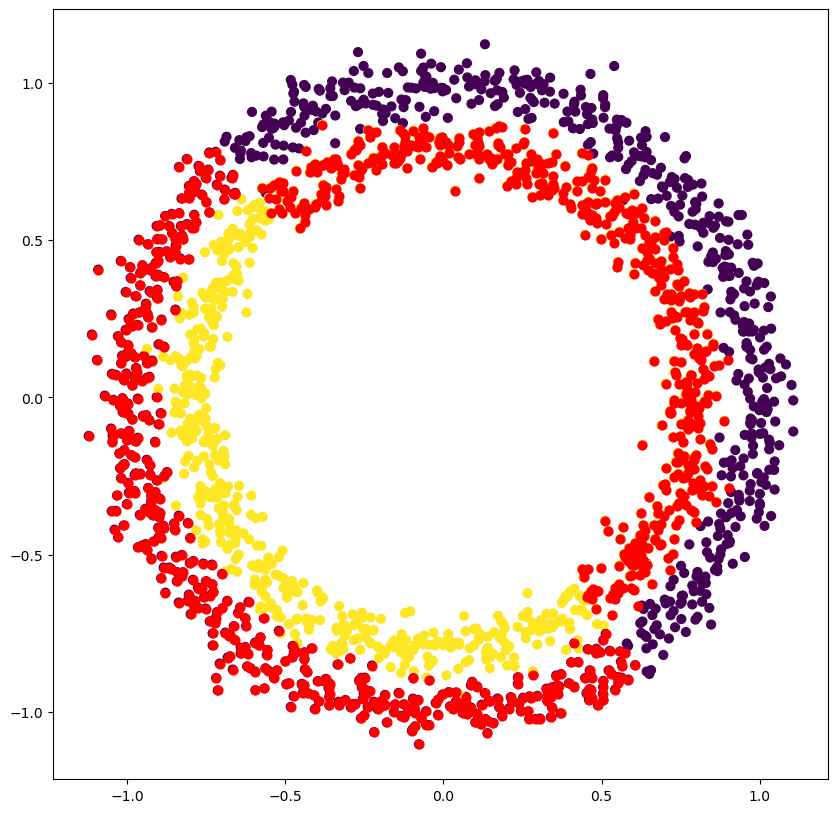

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(dx[:,0],dx[:,1],c=dy, s=40)

y_pred = perceptron4.predict(dx)
pred_class = y_pred.argmax(axis=1)
true_class = dy
plt.scatter(dx[pred_class!=true_class,0],dx[pred_class!=true_class,1],c='r', s=40)

### Define more complex model (Multilayer perceptron - MLP)

In [38]:
perceptron5 = Sequential()
perceptron5.add(Dense(5, input_dim=2, activation='relu'))
perceptron5.add(Dense(2, input_dim=5, activation='sigmoid'))
perceptron5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 15        
                                                                 
 dense_5 (Dense)             (None, 2)                 12        
                                                                 
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [39]:
perceptron5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
training_history = perceptron5.fit(dx, dyt, epochs=400, batch_size=len(X), verbose=0)

Training set loss: 0.16677893698215485, accuracy: 0.9725000262260437


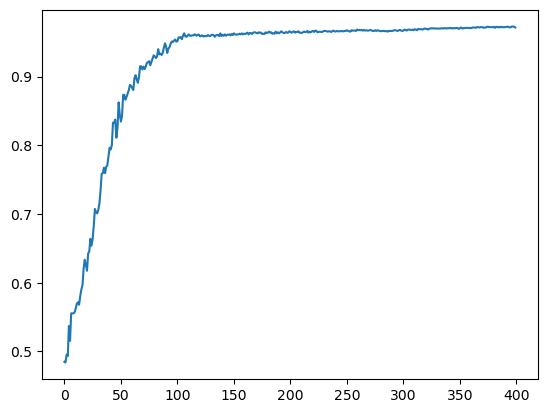

In [41]:
loss, accuracy = perceptron5.evaluate(dx, dyt, verbose=0)
print(f"Training set loss: {loss}, accuracy: {accuracy}")
plt.plot(training_history.history['accuracy'])

63/63 [==============================] - 0s 823us/step


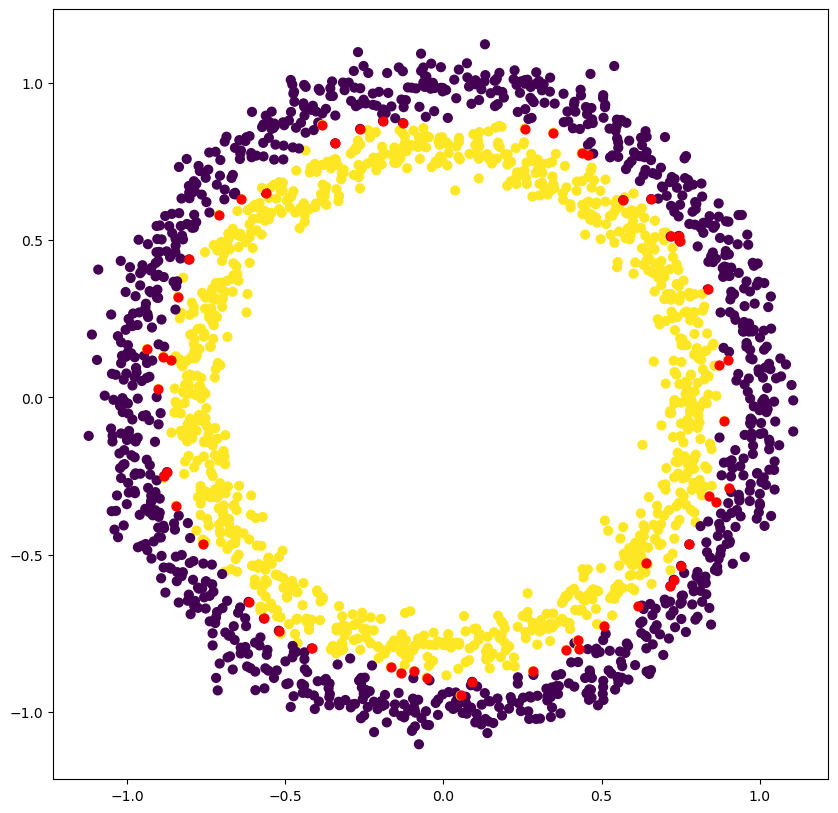

In [42]:
plt.figure(figsize=(10,10))
plt.scatter(dx[:,0],dx[:,1],c=dy, s=40)

y_pred = perceptron5.predict(dx)
pred_class = y_pred.argmax(axis=1)
true_class = dy
plt.scatter(dx[pred_class!=true_class,0],dx[pred_class!=true_class,1],c='r', s=40)

## Even more complex example: MLP regression

### generate data

Data shape: (1000, 1000). range: 0.00..1.00


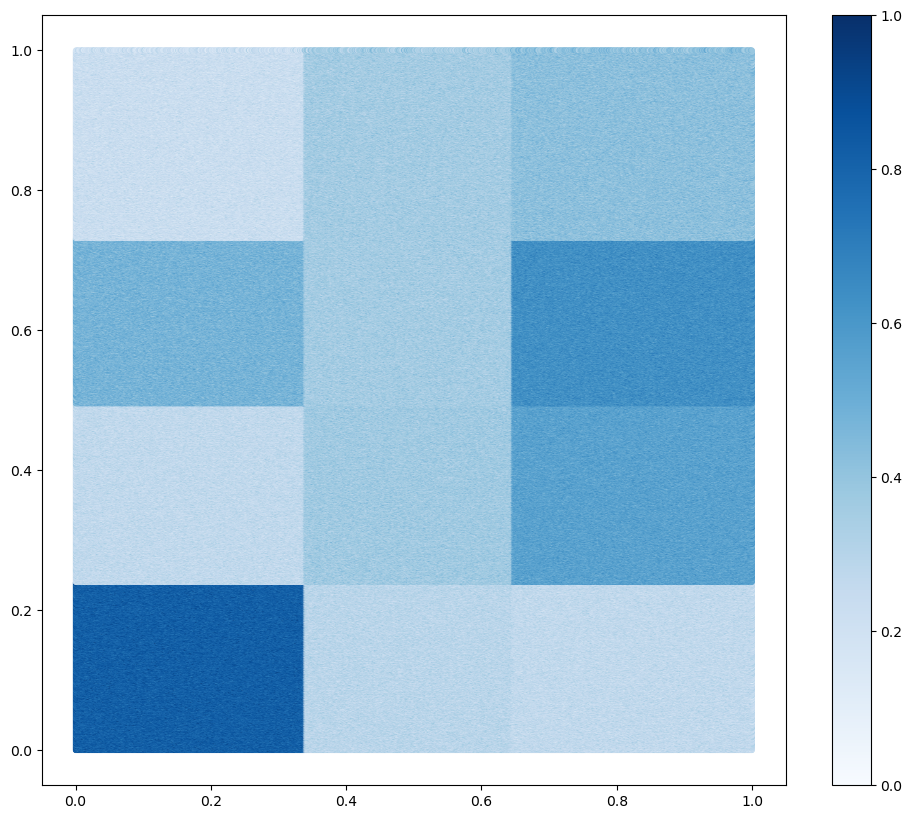

In [43]:
import sklearn.datasets

n_clusters = (4, 3)
shape_dims = (1000, 1000)
data, rows, columns = sklearn.datasets.make_checkerboard(
    shape=shape_dims, n_clusters=n_clusters, noise=5, shuffle=False, random_state=42
)
data=(data-data.min())/(data.max()-data.min())
print(f"Data shape: {data.shape}. range: {data.min():2.2f}..{data.max():2.2f}")
i, j = np.meshgrid ( np.linspace(0, 1, shape_dims[0]), np.linspace(0, 1, shape_dims[1]))

fig, ax = plt.subplots(figsize=(12,10));
plt.scatter(i, j, c=data, cmap=plt.cm.Blues, marker='.');
plt.colorbar(ax=ax)

In [44]:
X= np.hstack([i.reshape(-1,1), j.reshape(-1,1)])
y = data.reshape(-1,1)
print(f"dataset: {X.shape}, {y.shape}")

dataset: (1000000, 2), (1000000, 1)


split data into train, test and validation set

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print(f"Data size: Train {len(X_train)}, test: {len(X_test)}")

Data size: Train 850000, test: 150000


### Create & train the network

In [46]:
perceptron6 = Sequential()
perceptron6.add(Dense(25, input_dim=2, activation='relu'))
perceptron6.add(Dense(30, input_dim=25, activation='relu'))
perceptron6.add(Dense(30, input_dim=30, activation='relu'))
perceptron6.add(Dense(20, input_dim=30, activation='relu'))
perceptron6.add(Dense(5, input_dim=20, activation='relu'))
perceptron6.add(Dense(1, input_dim=5, activation=None))
perceptron6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 25)                75        
                                                                 
 dense_7 (Dense)             (None, 30)                780       
                                                                 
 dense_8 (Dense)             (None, 30)                930       
                                                                 
 dense_9 (Dense)             (None, 20)                620       
                                                                 
 dense_10 (Dense)            (None, 5)                 105       
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 2,516
Trainable params: 2,516
Non-traina

In [47]:
perceptron6.compile(loss='mean_squared_error', optimizer='adam', 
                    metrics=[tf.metrics.mean_squared_error, tf.metrics.mean_absolute_error])

In [48]:
training_history = perceptron6.fit(
    x=X_train, y=y_train, 
    epochs=75, batch_size=5000, 
    validation_split=0.2, # fraction of the data split for validation (not used for training)
    shuffle = True, # shuffle data before each epoch
    verbose=0)

In [49]:
training_history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])

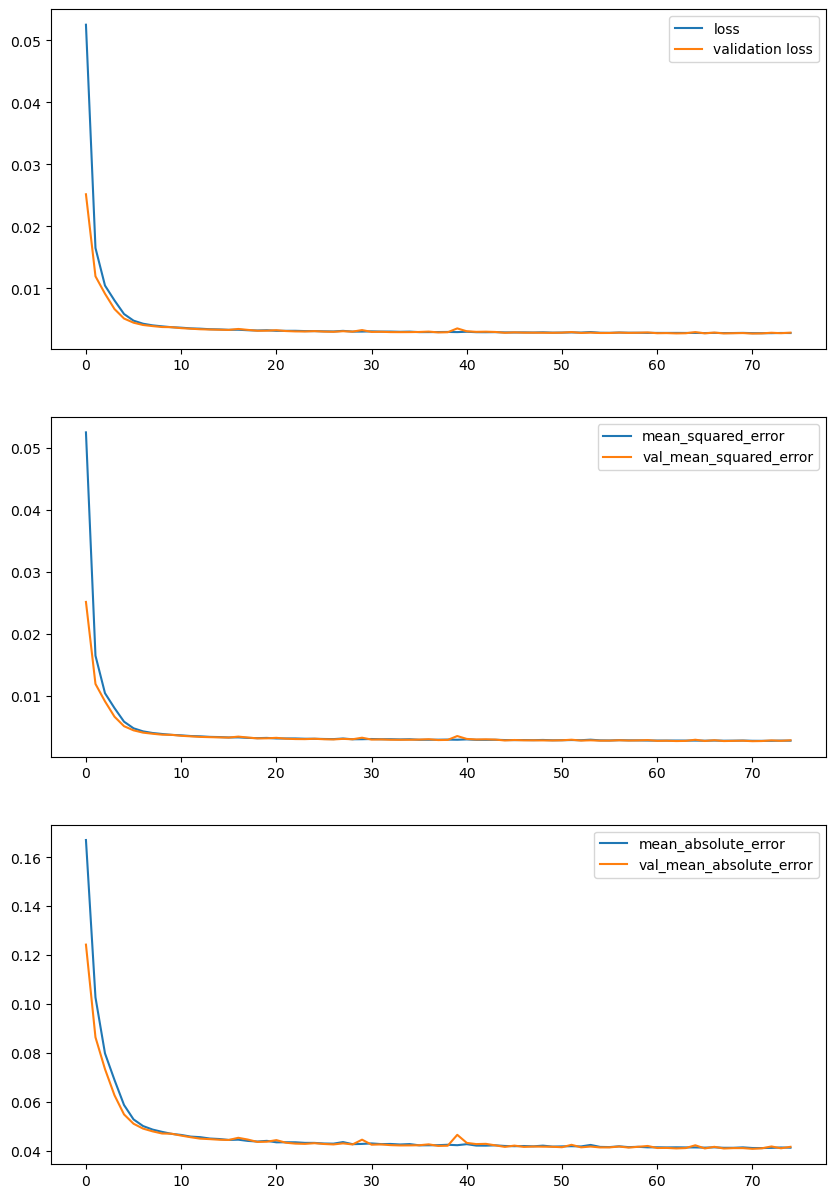

In [50]:
fig, ax = plt.subplots( 3 ,1, figsize=(10,15) )
ax[0].plot(training_history.history['loss'], label='loss')
ax[0].plot(training_history.history['val_loss'], label='validation loss')
ax[0].legend()

ax[1].plot(training_history.history['mean_squared_error'], label='mean_squared_error')
ax[1].plot(training_history.history['val_mean_squared_error'], label='val_mean_squared_error')
ax[1].legend()

ax[2].plot(training_history.history['mean_absolute_error'], label='mean_absolute_error')
ax[2].plot(training_history.history['val_mean_absolute_error'], label='val_mean_absolute_error')
ax[2].legend()

In [51]:
test_loss, test_mean_squared_error, test_mean_absolute_error = perceptron6.evaluate(X_test, y_test)

4688/4688 [==============================] - 5s 1ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - mean_absolute_error: 0.0415


4688/4688 [==============================] - 4s 930us/step


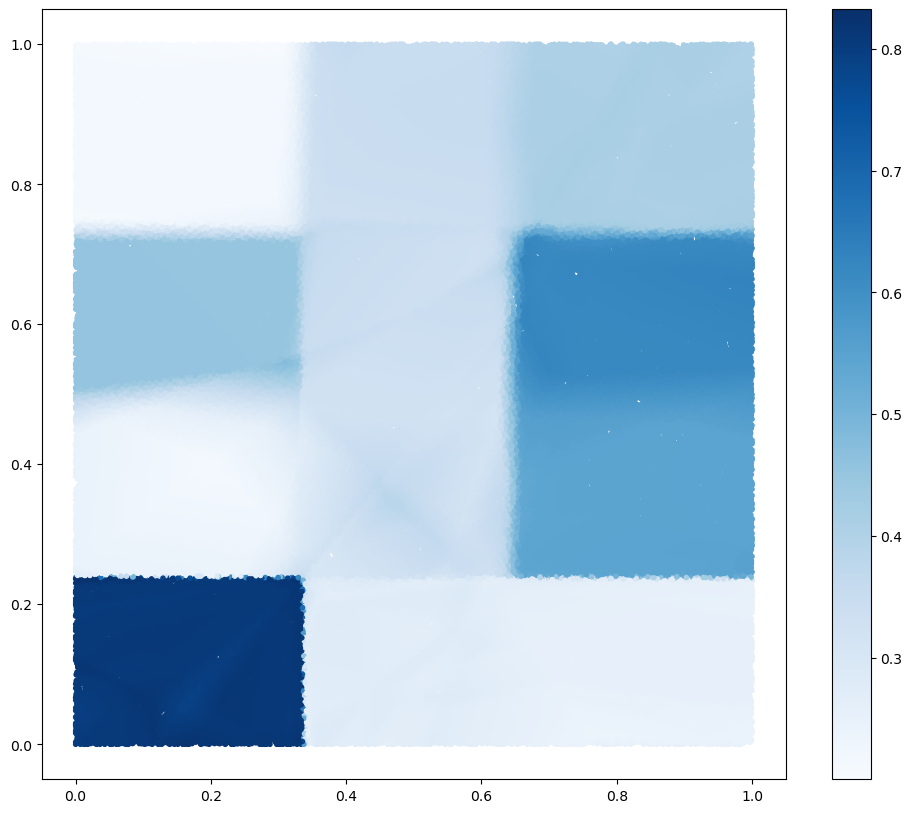

In [52]:
fig, ax = plt.subplots(figsize=(12,10));
plt.scatter(X_test[:,0], X_test[:,1], c=perceptron6.predict(X_test), cmap=plt.cm.Blues, marker='.');
plt.colorbar(ax=ax)

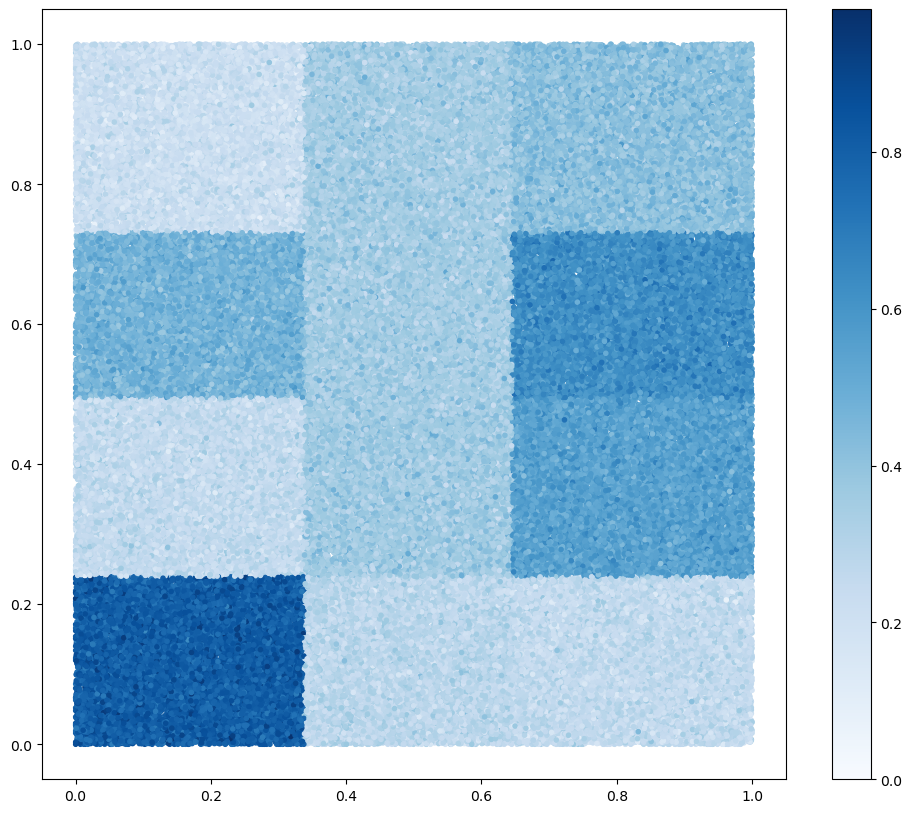

In [53]:
fig, ax = plt.subplots(figsize=(12,10));
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.Blues, marker='.');
plt.colorbar(ax=ax)